In [1]:
# Core Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from portfolio_optimizer import portfolio_optimizer
from backtest import backtest, display_backtest_results

# Cosmetics
import warnings
warnings.filterwarnings("ignore")
from IPython.display import display
from typing import List

# Read Data

In [2]:
# data used to replicate paper results
# VTI, AGG, DBC, VIX
start_date = "2010-01-01"
end_date = "2020-06-30"

price_long_paper = pd.read_csv("data_clean/long_format_daily_original_paper_data.csv")
price_long_paper["Date"] = pd.to_datetime(price_long_paper["Date"])
price_long_paper = price_long_paper.loc[(price_long_paper["Date"] >= start_date) & (price_long_paper["Date"] <= end_date), :]
price_wide_paper = price_long_paper.pivot(index='Date', columns='Ticker', values='Price')

Text(0.5, 1.0, 'Closed Price')

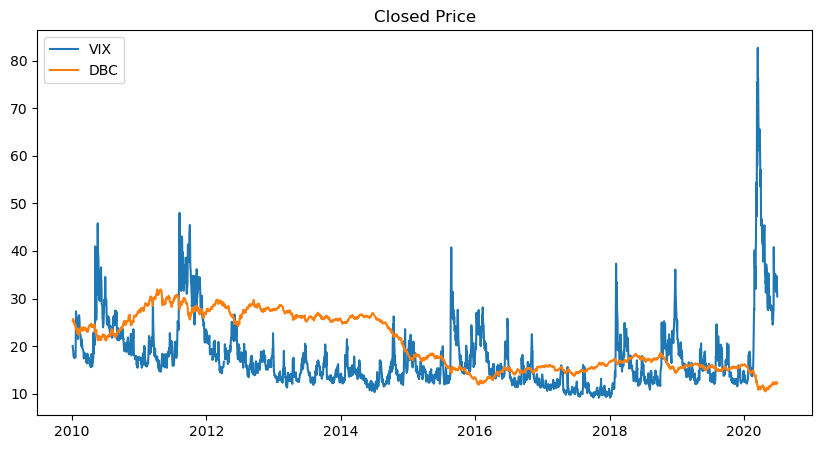

In [3]:
plt.figure(figsize = (10, 5))
plt.plot(price_wide_paper["VIX"], label = "VIX")
plt.plot(price_wide_paper["DBC"], label = "DBC")
plt.legend()
plt.title("Closed Price")

In [4]:
# # full data
# start_date = "1995-01-01"
# end_date = "2022-12-31"

# price_long = pd.read_csv("data_clean/long_format_daily.csv")
# price_long["Date"] = pd.to_datetime(price_long["Date"])
# price_long = price_long.loc[(price_long["Date"] >= start_date) & (price_long["Date"] <= end_date), :]

# # very short data for testing
# price_long_test = price_long.loc[(price_long["Date"] >= '2022-01-01'), :]
# price_wide_test = price_long_test.pivot(index='Date', columns='Ticker', values='Price')
# return_wide_test = price_wide_test.pct_change().iloc[1:,:]

# Replicate Paper Result

In [5]:
%%time
tf.keras.utils.set_random_seed(100)

portfolio_paper = portfolio_optimizer(price_long_paper)
weight_LSTM = portfolio_paper.optimize("LSTM", period = 252)

# static allocations
weight_alloc_1 = weight_LSTM.copy()
weight_alloc_2 = weight_LSTM.copy()
weight_alloc_3 = weight_LSTM.copy()
weight_alloc_4 = weight_LSTM.copy()
weight_alloc_1["Weight"] = 1/4
weight_alloc_2.loc[weight_alloc_2["Ticker"] == "VTI", "Weight"] = 1/2
weight_alloc_2.loc[weight_alloc_2["Ticker"] == "AGG", "Weight"] = 1/10
weight_alloc_2.loc[weight_alloc_2["Ticker"] == "DBC", "Weight"] = 1/5
weight_alloc_2.loc[weight_alloc_2["Ticker"] == "VIX", "Weight"] = 1/5
weight_alloc_3.loc[weight_alloc_3["Ticker"] == "VTI", "Weight"] = 1/10
weight_alloc_3.loc[weight_alloc_3["Ticker"] == "AGG", "Weight"] = 1/2
weight_alloc_3.loc[weight_alloc_3["Ticker"] == "DBC", "Weight"] = 1/5
weight_alloc_3.loc[weight_alloc_3["Ticker"] == "VIX", "Weight"] = 1/5
weight_alloc_4.loc[weight_alloc_4["Ticker"] == "VTI", "Weight"] = 2/5
weight_alloc_4.loc[weight_alloc_4["Ticker"] == "AGG", "Weight"] = 2/5
weight_alloc_4.loc[weight_alloc_4["Ticker"] == "DBC", "Weight"] = 1/10
weight_alloc_4.loc[weight_alloc_4["Ticker"] == "VIX", "Weight"] = 1/10

1/1 [==============================] - 0s 344ms/step
successfully optimized portfolio weights
CPU times: total: 1min 24s
Wall time: 24.4 s


,LSTM,Allocation 1,Allocation 2,Allocation 3,Allocation 4
avg annualized ret,0.196748,0.241715,0.221830,0.194304,0.140771
avg annualized std,0.303979,0.297687,0.207538,0.252811,0.096675
sharpe ratio,0.647243,0.811977,1.068864,0.768573,1.456123
adjusted sharpe ratio,0.656156,0.557261,0.003432,0.605477,-2.024451
skewness,1.093407,2.596907,2.916277,2.443905,2.891536
excess kurtosis,5.968379,24.212207,31.853192,21.341029,34.999354
maximum drawdown,-0.290894,-0.182366,-0.126222,-0.164534,-0.080612
maximum drawdown length (days),369.000000,89.000000,249.000000,89.000000,83.000000
VaR (95%),-0.025345,-0.022812,-0.015943,-0.019591,-0.007292
CVaR (95%),-0.039113,-0.030872,-0.021658,-0.026467,-0.010298


CPU times: total: 4.48 s
Wall time: 10.1 s


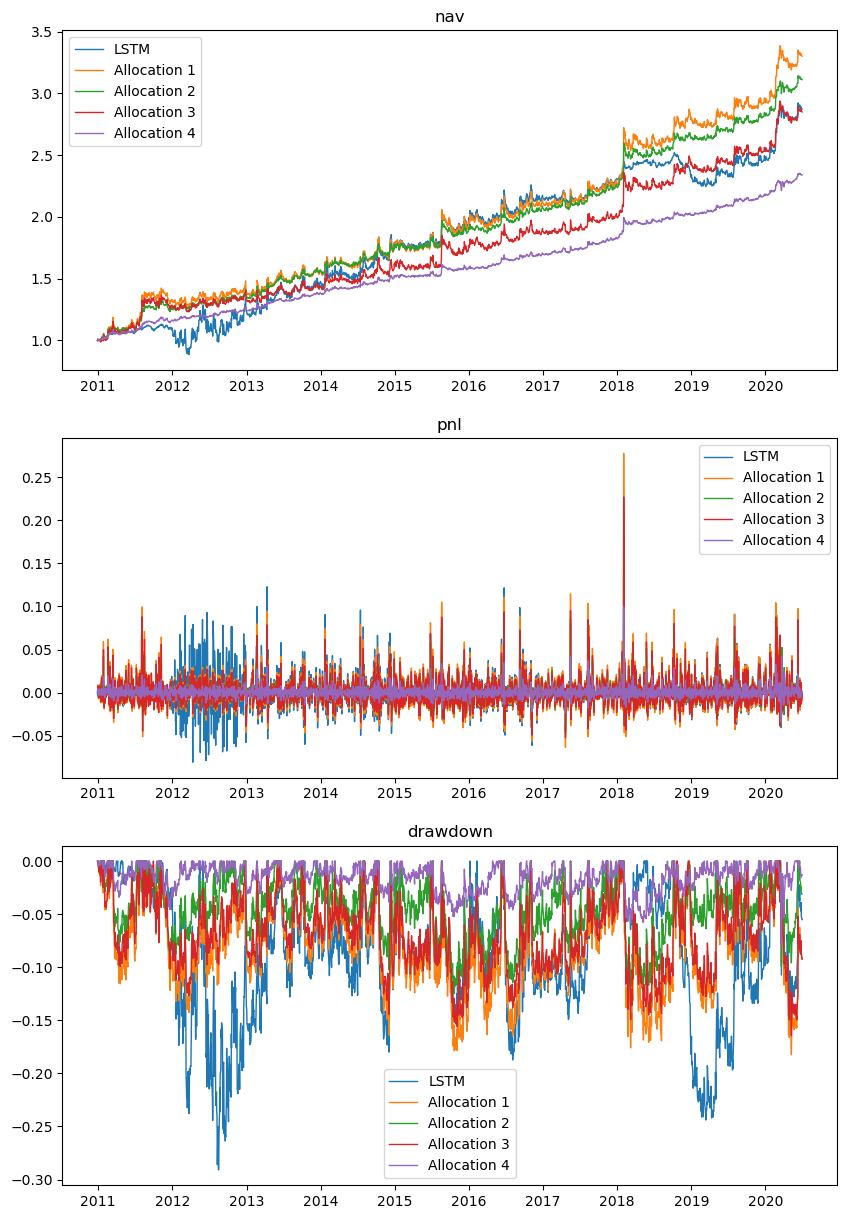

In [6]:
%%time
display_backtest_results([weight_LSTM, weight_alloc_1, weight_alloc_2, weight_alloc_3, weight_alloc_4], 
                         ["LSTM", "Allocation 1", "Allocation 2", "Allocation 3", "Allocation 4"])

# Better Benchmarks

In [7]:
%%time
weight_variance = portfolio_paper.optimize("variance", period = 252)
weight_sharpe = portfolio_paper.optimize("sharpe", period = 252)
weight_markowitz3 = portfolio_paper.optimize("markowitz3", period = 252)
weight_DR = portfolio_paper.optimize("divers_ratio", period = 252)
weight_MRC = portfolio_paper.optimize("marginal_risk_contribution", period = 252)

successfully optimized portfolio weights
successfully optimized portfolio weights
successfully optimized portfolio weights
successfully optimized portfolio weights
successfully optimized portfolio weights
CPU times: total: 188 ms
Wall time: 536 ms


,LSTM,minVar,maxSharpe,Markowitz 3.0,maxDR,minMRC
avg annualized ret,0.196748,0.053237,0.099617,0.106874,0.138780,0.035015
avg annualized std,0.303979,0.034375,0.059285,0.158691,0.076106,0.030779
sharpe ratio,0.647243,1.548736,1.680295,0.673474,1.823509,1.137634
adjusted sharpe ratio,0.656156,-3.164343,-0.696500,-0.064787,-3.427763,0.228074
skewness,1.093407,-1.126662,0.368762,3.847136,0.422871,-1.123463
excess kurtosis,5.968379,27.539844,12.901778,80.853557,21.712677,10.876209
maximum drawdown,-0.290894,-0.087113,-0.103538,-0.240439,-0.144964,-0.070101
maximum drawdown length (days),369.000000,82.000000,80.000000,132.000000,80.000000,96.000000
VaR (95%),-0.025345,-0.002882,-0.004903,-0.008209,-0.005794,-0.002842
CVaR (95%),-0.039113,-0.004823,-0.008203,-0.021791,-0.010217,-0.004429


CPU times: total: 3.28 s
Wall time: 11.4 s


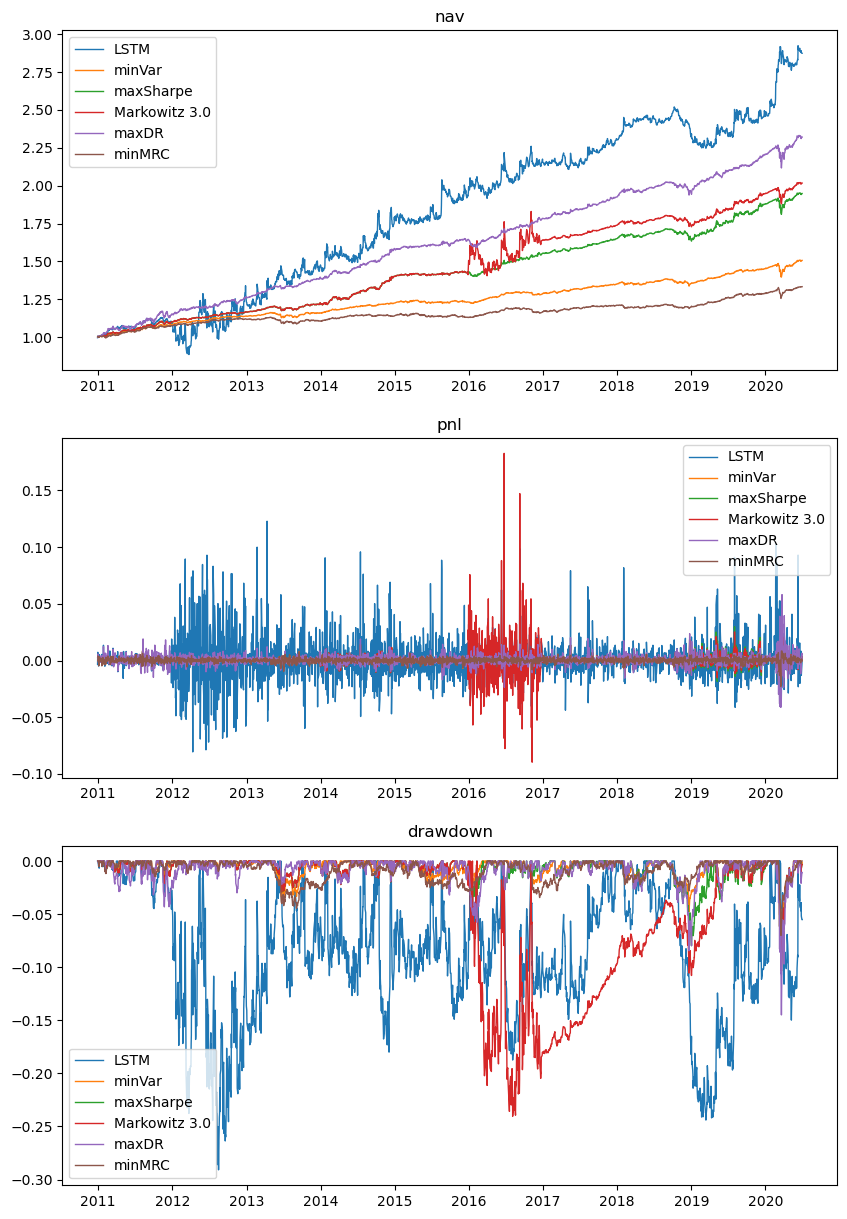

In [8]:
%%time
display_backtest_results(
    [weight_LSTM,
     weight_variance,
     weight_sharpe,
     weight_markowitz3,
     weight_DR,
     weight_MRC
    ],
    ["LSTM", "minVar", "maxSharpe", "Markowitz 3.0", "maxDR", "minMRC"]
)

# Analyze LSTM

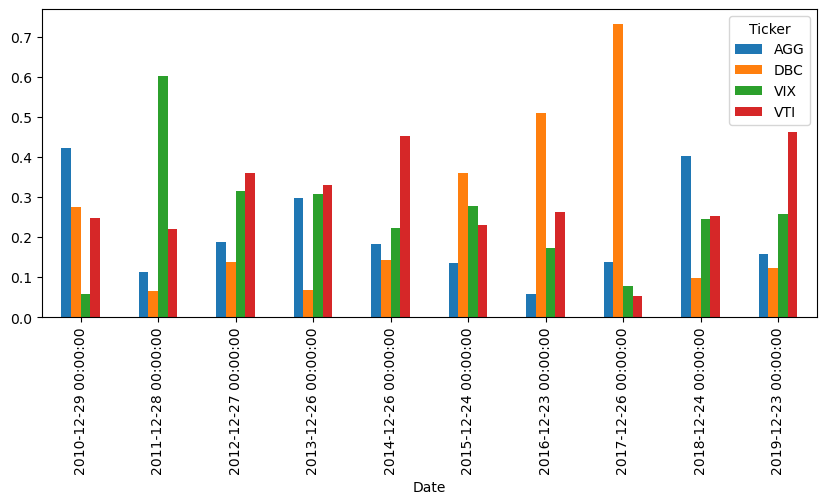

In [9]:
plot_weight = weight_LSTM.groupby(['Ticker', 'Weight'])['Date'].first().to_frame().reset_index()
plot_weight.pivot("Date", "Ticker", "Weight").plot(kind='bar', figsize = (10, 4));

1/1 [==============================] - 0s 344ms/step
successfully optimized portfolio weights
1/1 [==============================] - 0s 328ms/step
successfully optimized portfolio weights
1/1 [==============================] - 0s 328ms/step
successfully optimized portfolio weights
1/1 [==============================] - 0s 337ms/step
successfully optimized portfolio weights


,LSTM (orig),seed 1,seed 2,seed 3,seed 4
avg annualized ret,0.196748,0.220942,0.224353,0.194677,0.170372
avg annualized std,0.303979,0.421406,0.286285,0.456826,0.406227
sharpe ratio,0.647243,0.524297,0.783672,0.426151,0.419402
adjusted sharpe ratio,0.656156,0.515955,0.297915,0.439027,0.419616
skewness,1.093407,1.909287,3.350381,1.686715,1.734643
excess kurtosis,5.968379,15.955513,41.323892,11.839156,16.474486
maximum drawdown,-0.290894,-0.394521,-0.277767,-0.420532,-0.368404
maximum drawdown length (days),369.000000,450.000000,450.000000,1002.000000,133.000000
VaR (95%),-0.025345,-0.032673,-0.020936,-0.039012,-0.035958
CVaR (95%),-0.039113,-0.055728,-0.034254,-0.059521,-0.054606


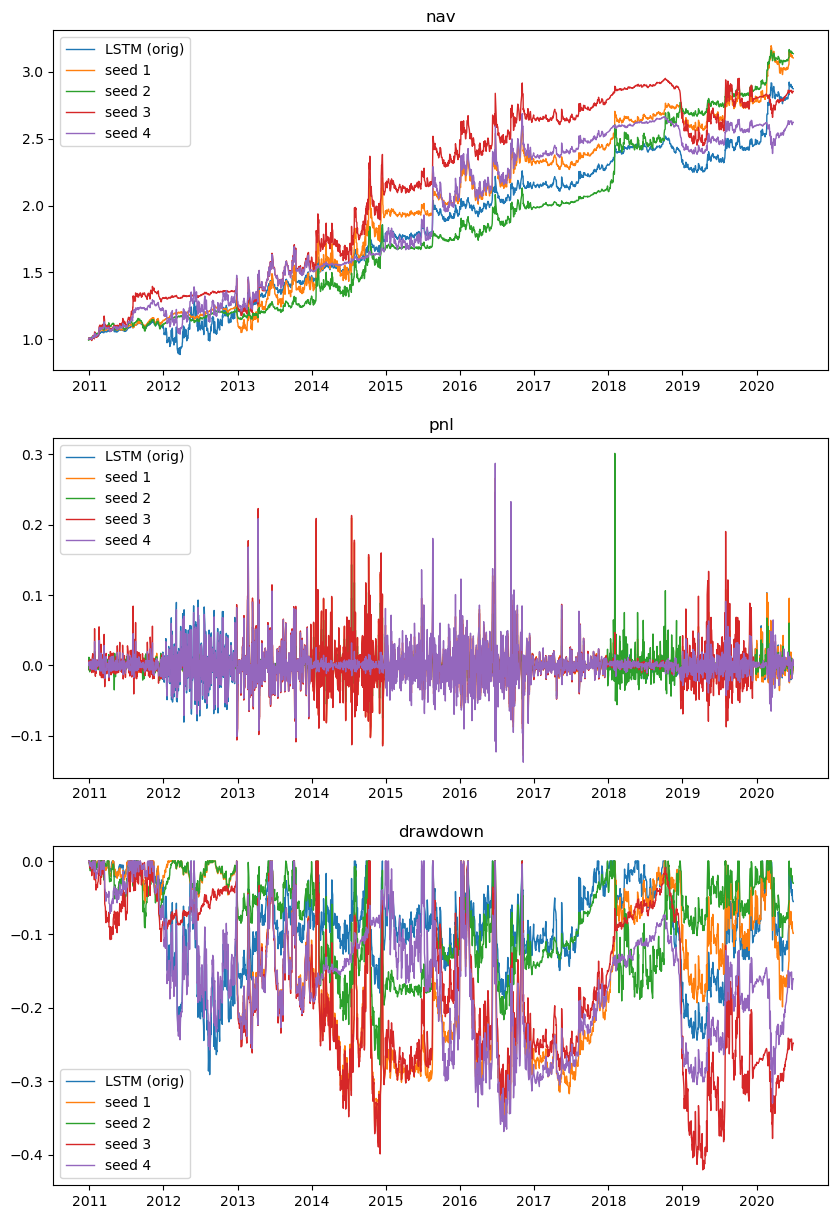

In [34]:
# Stability over different seeds
tf.keras.utils.set_random_seed(round(np.random.rand() * 1000))
seed_1 = portfolio_paper.optimize("LSTM", period = 252)
tf.keras.utils.set_random_seed(round(np.random.rand() * 1000))
seed_2 = portfolio_paper.optimize("LSTM", period = 252)
tf.keras.utils.set_random_seed(round(np.random.rand() * 1000))
seed_3 = portfolio_paper.optimize("LSTM", period = 252)
tf.keras.utils.set_random_seed(round(np.random.rand() * 1000))
seed_4 = portfolio_paper.optimize("LSTM", period = 252)

display_backtest_results([weight_LSTM, seed_1, seed_2, seed_3, seed_4], 
                         ["LSTM (orig)", "seed 1", "seed 2", "seed 3", "seed 4"])